### Read Dataset

In [1]:
import pandas as pd #library untuk manipulasi data

In [5]:
df_fruit = pd.read_excel('fruit.xlsx') #membaca dataset fruit.xlsx
df_fruit #menampilkan dataset

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


In [6]:
df_fruit.info() #menampilkan informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [7]:
df_fruit.describe() #menampilkan deskripsi dataset

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [8]:
pd.unique(df_fruit['name']) #menampilkan nilai unik pada kolom name

array(['orange', 'grapefruit'], dtype=object)

In [9]:
df_fruit['name'].value_counts() #menampilkan frekuensi pada kolom name

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder() #membuat objek label_encoder
df_fruit['name'] = en.fit_transform(df_fruit['name']) #mengubah nilai unik menjadi angka
df_fruit['name'].value_counts()

name
1    5000
0    5000
Name: count, dtype: int64

### Split Dependent (Target / Label) Independent (Atribut) Variabel

In [34]:
x = df_fruit.drop('name', axis=1) #menghapus kolom name,selain name akan dimasukkan ke variabel x
y = df_fruit['name'] #mengambil kolom name untuk variabel y


### Fitur Scaling


In [16]:
from sklearn.preprocessing import MinMaxScaler #library untuk membuat data numerik berada di rentang nilai yang sama atau berdekatan
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

### Split Train Test


In [17]:
from sklearn.model_selection import train_test_split #library untuk membagi dataset menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Klasifikasi KNN


In [18]:
from sklearn.neighbors import KNeighborsClassifier

### Training / Fit Model


In [25]:
knn = KNeighborsClassifier(n_neighbors=21 , metric='euclidean') #membuat objek knn
knn.fit(x_train, y_train) #melatih knn

knn

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

### Prediksi / Test

In [26]:
y_pred = knn.predict(x_test) #melakukan prediksi
y_pred

array([0, 1, 1, ..., 0, 0, 0])

### Cek Akurasi dan Evaluasi


In [27]:
from sklearn.metrics import accuracy_score #library untuk menghitung akurasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb

In [28]:
print("Nilai akurasi adalah : ", accuracy_score(y_test, y_pred)) #menghitung akurasi

Nilai akurasi adalah :  0.926


              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1489
           1       0.93      0.92      0.93      1511

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



<Axes: >

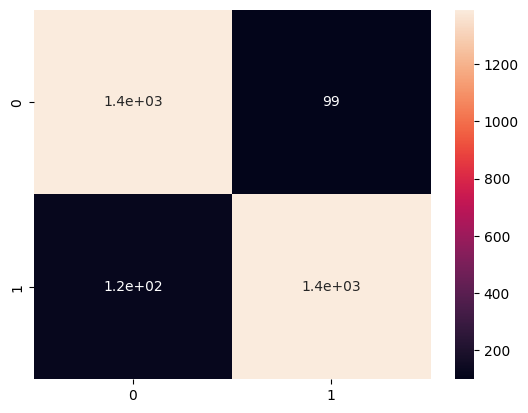

In [29]:
print(classification_report(y_test, y_pred)) #menampilkan report klasifikasi
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True) #menampilkan confusion matrix

### Mencari Nilai k yang Terbaik

In [24]:
n_akurasi = []
for k in range(1, 1000):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    n_akurasi.append(accuracy_score(y_test, y_pred))

print(n_akurasi)
print("Nilai akurasi tertinggi berada pada nilai K: ",n_akurasi.index(max(n_akurasi))+1)
print("Nilai akurasi tertinggi: ",max(n_akurasi))

[0.8996666666666666, 0.8986666666666666, 0.9166666666666666, 0.911, 0.9176666666666666, 0.9143333333333333, 0.9216666666666666, 0.9196666666666666, 0.9216666666666666, 0.9213333333333333, 0.9223333333333333, 0.9213333333333333, 0.922, 0.9236666666666666, 0.923, 0.9196666666666666, 0.923, 0.9236666666666666, 0.9246666666666666, 0.923, 0.926, 0.9236666666666666, 0.9253333333333333, 0.9236666666666666, 0.9246666666666666, 0.9243333333333333, 0.9233333333333333, 0.9226666666666666, 0.9233333333333333, 0.9216666666666666, 0.9223333333333333, 0.922, 0.9223333333333333, 0.922, 0.924, 0.9223333333333333, 0.922, 0.9233333333333333, 0.9226666666666666, 0.923, 0.923, 0.9223333333333333, 0.9213333333333333, 0.922, 0.9213333333333333, 0.922, 0.9213333333333333, 0.923, 0.9203333333333333, 0.9216666666666666, 0.9213333333333333, 0.9216666666666666, 0.9216666666666666, 0.922, 0.9213333333333333, 0.9216666666666666, 0.9216666666666666, 0.922, 0.9226666666666666, 0.9223333333333333, 0.922, 0.923, 0.9223

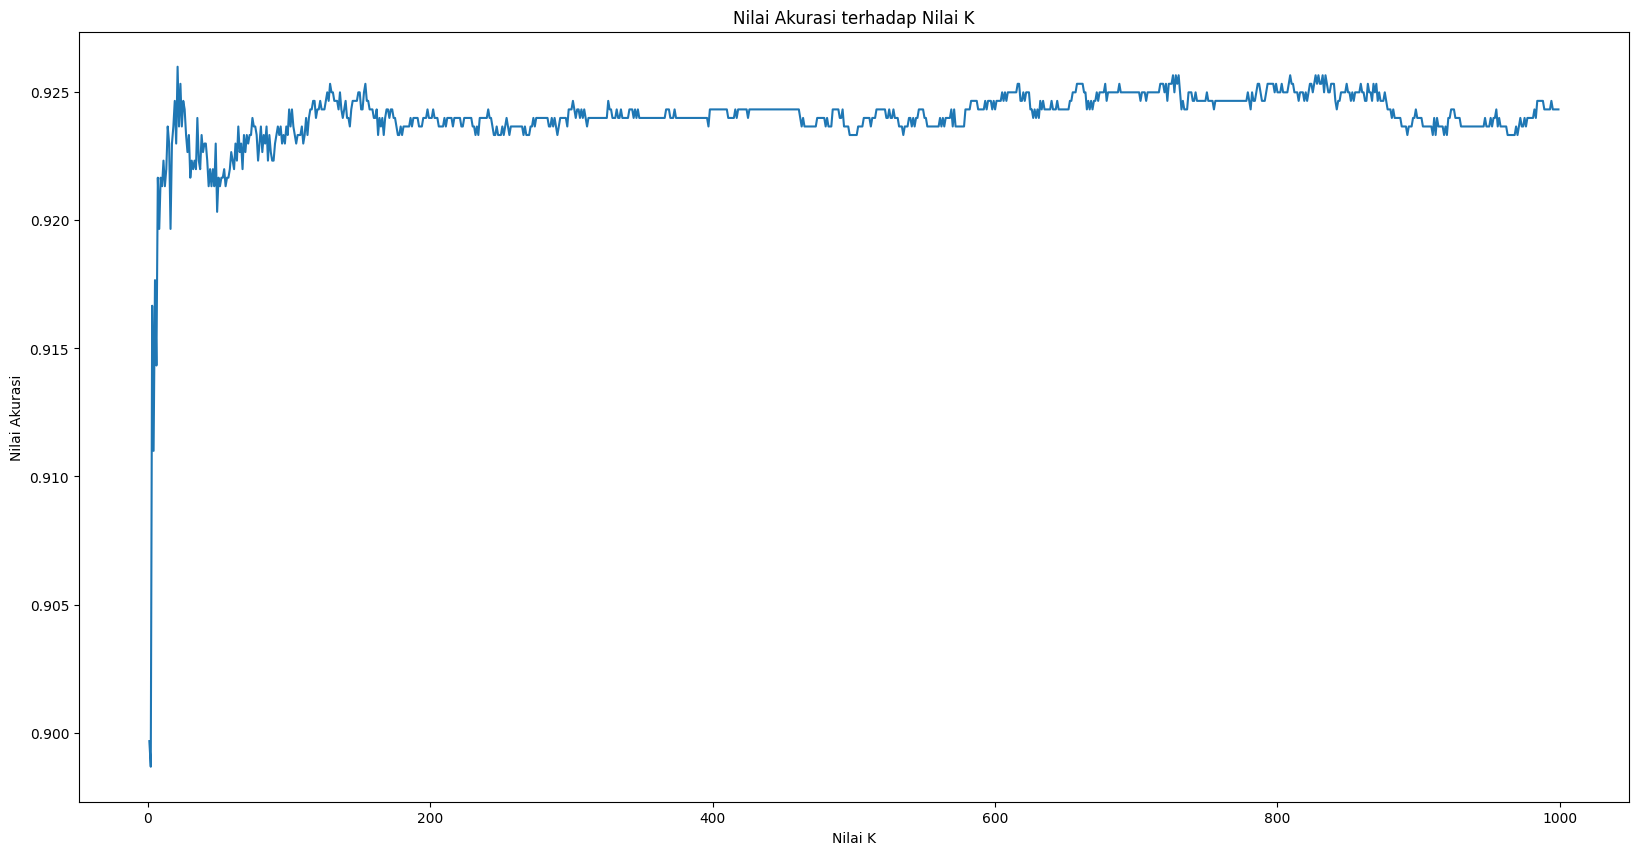

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(range(1, 1000), n_akurasi)
plt.title('Nilai Akurasi terhadap Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Nilai Akurasi')
plt.show()

### Klasifikasi Data Baru

In [35]:
new_fruit = [[9, 174, 154, 20, 78]]#memasukkan data baru
knn.predict(new_fruit)
print(knn.predict(new_fruit))

[0]


### Model


In [36]:
import pickle #library untuk menyimpan model
pickle.dump(knn, open('fruit.pkl', 'wb'))